### Часть первая: о теореме Байеса ###

*1.Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.*

**Ответ:**

Пусть:
- $A$ - виновен
- $B$ - редкая группа крови

Из условия задачи имеем:

$P(B) = 0.01$ - вероятность того, что у любого челокека (в том числе подозреваемого) редкая группа крови

Так же мы имеем вероятость того, что у человека **редкая группа крови при условии, что он убийца(веновен)**:

$P(B | A) = 1$

Прокурор оценил вероятность $P(B)$ - вероятность того, что у подсудимого редкая группа крови вне зависимости от того является ли он убийцей или нет.

На самом деле прокурор должен был оценить $P(A|B)$ - вероятность того, что **подозреваемый - убийца, при условии, что у подозреваемого редкая группа крови**:

$P(A | B) = \frac{P(A) P(B | A)}{P(B)} = \frac{P(A) * 1 }{0.01} = 100 * P(A)$

Вывод, который можно сделать из этой информации - это то, что поле определения группы крови подозреваемого вероятность того, что он является убийцей возросла в 100 раз.



*2.	Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?*

**Ответ:**

Адвокат не прав в том, что он оценил вероятность виновности любого случайно взятого жителя города при условии, что у него редкая группа крови:

Вероятность того, что любой случайно взятый житель города является убийцей:

$P(A_{случайный}) = \frac{1}{1 000 000} = 0,000001 = 0,0001\% $

Зная, что при наличии редкой группы крови вероятность виновности возрастает в 100 раз:

$P(A_{случайный} | B) = 100 * P(A) = 100 * 0,0001\% = 0,01\%$


Адвокат должен был оценить вероятность **невиновности подсудимого при наличии у него редкой группы крови**.



*3.	Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?*

из лекции:
- d = 0 - человек здоров;
- d = 1 - человек болен;
- t = 0 - тест дал отрицательный результат;
- t = 1 - тест дал положительный результат.

Вероятность болезни при отрицательном результате теста:

$$P(d = 1|t = 0) = \frac{P(t = 0|d = 1) * P(d = 1)}{P(t = 0)} = $$

$$ = \frac{P(t = 0|d = 1) * P(d = 1)}{P(t = 0|d = 1) * P(d = 1) + P(t = 0|d = 0) * P(d = 0)} = $$

$$ \frac{P(t = 0|d = 1) * 0.01}{P(t = 0|d = 1) * 0.01 + 0.95 * 0.99} $$

Вероятность отсутствия болезни при положительном результате теста:

$$P(d = 0|t = 1) = \frac{P(t = 1|d = 0) * P(d = 0)}{P(t = 1)} = $$

$$ = \frac{P(t = 1|d = 0) * P(d = 0)}{P(t = 1|d = 1) * P(d = 1) + P(t = 1|d = 0) * P(d = 0)} = $$

$$ \frac{P(t = 1|d = 0) * 0.99}{0.95 * 0.01 + P(t = 1|d = 0) * 0.99} $$


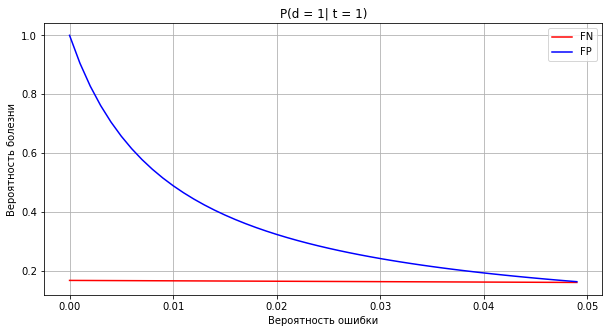

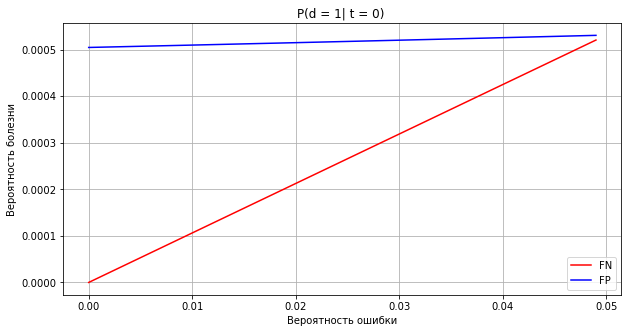

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def posterior_I_T_pos(FN, FP):
    return ((1-FN)*0.01)/((1-FN)*0.01+FP*0.99)

def posterior_T_T_neg(FN, FP):
    return (FN*0.01)/((1-FP)*0.99+FN*0.01)

errors = np.arange(0, 0.05, 0.001)

plt.figure(figsize=(10,5))
plt.plot(errors, [posterior_I_T_pos(e, 0.05) for e in errors], color='r', label='FN')
plt.plot(errors, [posterior_I_T_pos(0.05, e) for e in errors], color='b', label='FP')
plt.legend()
plt.grid()
plt.title('P(d = 1| t = 1)')
plt.xlabel('Вероятность ошибки')
plt.ylabel('Вероятность болезни')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(errors, [posterior_T_T_neg(e, 0.05) for e in errors] , color='r', label='FN')
plt.plot(errors, [posterior_T_T_neg(0.05, e) for e in errors], color='b', label='FP')
plt.legend()
plt.grid()
plt.title('P(d = 1| t = 0) ')
plt.xlabel('Вероятность ошибки')
plt.ylabel('Вероятность болезни')
plt.show()

Вывод - при уменьшении false negative вероятность болезни всегда ниже - считаю стоит сосредоточится на этом.

### Часть вторая: о линейной регрессии ###

In [72]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model
from sklearn.utils.testing import ignore_warnings
from scipy.stats import multivariate_normal
from sklearn.exceptions import ConvergenceWarning
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import mean_squared_error as mse

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

xs = np.arange(0, 200, 1)

### Задание 1

In [73]:
data = pd.read_csv('owid-covid-data.csv')

In [74]:
Russia = data[data['location']=='Russia'][['date','new_cases','total_cases']]

In [75]:
Russia = Russia[pd.to_datetime(Russia['date']) >= pd.to_datetime('2020-03-03')]

### Задание 2

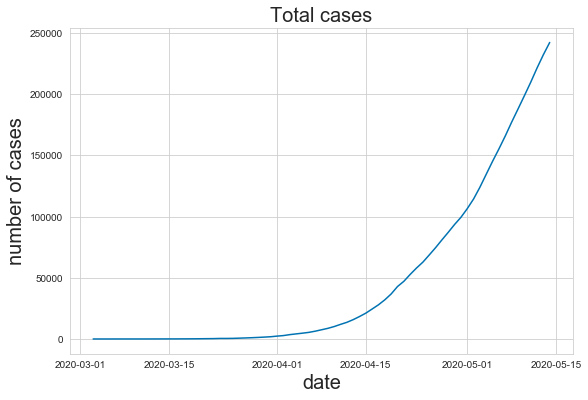

In [76]:
plt.figure(figsize=(9,6))
plt.title('Total cases', fontsize=20)
plt.xlabel('date', fontsize=20)
plt.ylabel('number of cases', fontsize=20)
plt.plot(pd.to_datetime(Russia['date']),Russia['total_cases']);

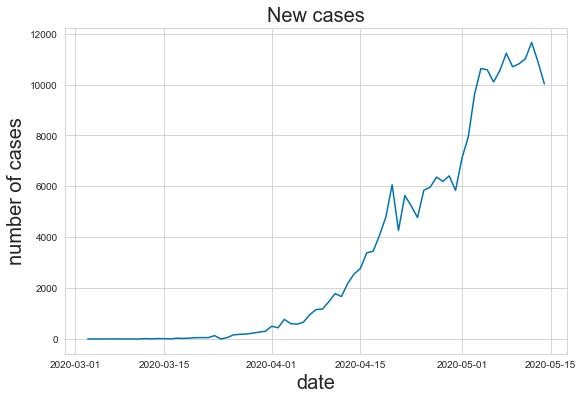

In [77]:
plt.figure(figsize=(9,6))
plt.title('New cases',fontsize=20)
plt.xlabel('date', fontsize=20)
plt.ylabel('number of cases', fontsize=20)
plt.plot(pd.to_datetime(Russia['date']),Russia['new_cases']);

In [78]:
train = Russia[:50]
test = Russia[50:]

In [79]:
y_train = np.log(train['total_cases'])
y_test = np.log(test['total_cases'])
X_train = pd.to_datetime(train['date'])-pd.to_datetime('2020-03-03')
X_train = np.array([X_train.apply(lambda x: x.days)]).T
X_test = pd.to_datetime(test['date'])-pd.to_datetime('2020-03-03')
X_test = np.array([X_test.apply(lambda x: x.days)]).T
X_all = np.concatenate([X_train,X_test], axis = 0)
y_all = np.concatenate([y_train,y_test], axis = 0)

linear_regression = LinearRegression().fit(X_train,y_train)

MSE train: 0.128772948328438
MSE test: 5.505196378886351
MSE train (in terms of exp):  89876671.94553281
MSE test (in terms of exp):  12034676639488.834


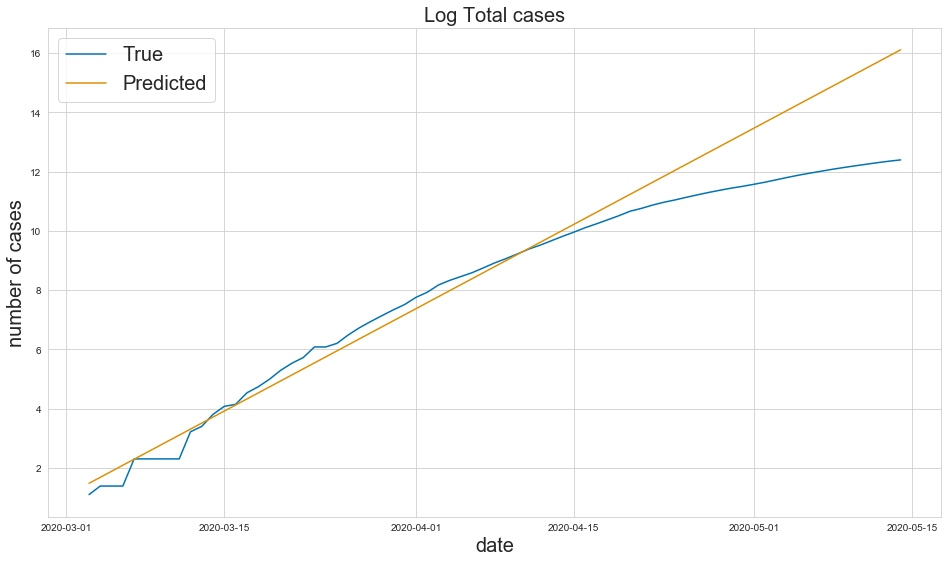

In [80]:
print('MSE train:',mse(linear_regression.predict(X_train),y_train))
print('MSE test:',mse(linear_regression.predict(X_test),y_test))
print('MSE train (in terms of exp): ', mse(np.exp(linear_regression.predict(X_train)),np.exp(y_train)))
print('MSE test (in terms of exp): ', mse(np.exp(linear_regression.predict(X_test)),np.exp(y_test)))
plt.figure(figsize=(16,9))
plt.title('Log Total cases', fontsize=20)
plt.xlabel('date', fontsize=20)
plt.ylabel('number of cases', fontsize=20)
plt.plot(pd.to_datetime(Russia['date']),np.log(Russia['total_cases']), label = 'True');
plt.plot(pd.to_datetime(Russia['date']),linear_regression.predict(X_all), label = 'Predicted')
plt.legend(fontsize = 20);

In [81]:
N = 250
X = np.linspace(-10, 10, N)
Y = np.linspace(-10, 10, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

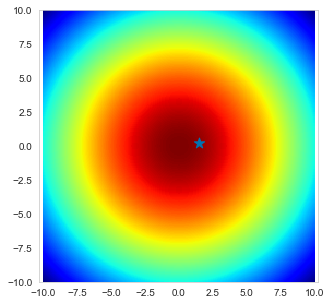

In [82]:
sigma = np.sqrt(mse(linear_regression.predict(X_train),y_train))
w_1 = linear_regression.coef_[0]
w_0 = linear_regression.intercept_

def myplot_heatmap(Z, print_point = True):
    # Make the plot
    plt.axis('equal')
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    if print_point:
        plt.scatter(w_0, w_1, marker='*', s=120)

# априорное распределение параметров w 
cur_mu, cur_sigma = np.array([0, 0]), np.array([[100, 0], [0, 100]])
Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)

fig = plt.figure(figsize=(5, 5))
myplot_heatmap(Z)

In [83]:
def bayesian_update(mu, sigma, x, y, sigma_noise = sigma):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2))\
                     * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

def myplot_sample_lines(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем прямые экспоненты
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    for w in my_w:
        plt.plot(xs, np.exp(w[0] + w[1]*xs), 'k-', lw=.4)
    plt.ylim((-0.01, 100000))
    plt.xlim((-0.01, 50))
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)
        
def sample_statistics(mu, sigma, xs, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        res[i,:] = w[0] + w[1]*xs
    return res

def plot_predictions(xs, mu, x):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.set_xlim((-0.01, 100))
    ax.set_ylim((-0.01, 100000))
    ax.plot(xs, np.exp(mu[1]*xs + mu[0]), color="red", label="MAP гипотеза")
    ax.fill_between(xs, np.exp(mu[1]*xs + mu[0] - sigma), np.exp(mu[1]*xs + mu[0] + sigma), color=palette[1], alpha=.3, label="+- дисперсия шума")
    ax.fill_between(xs, np.exp(np.mean(x, axis=0) - np.std(x, axis=0)), np.exp(np.mean(x, axis=0) + np.std(x, axis=0)), color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    ax.legend(fontsize=legend_fontsize)

mu: 
 [1.09757024 0.28835281]
sigma: 
 [[ 0.12844236 -0.12827718]
 [-0.12827718  0.25671954]]


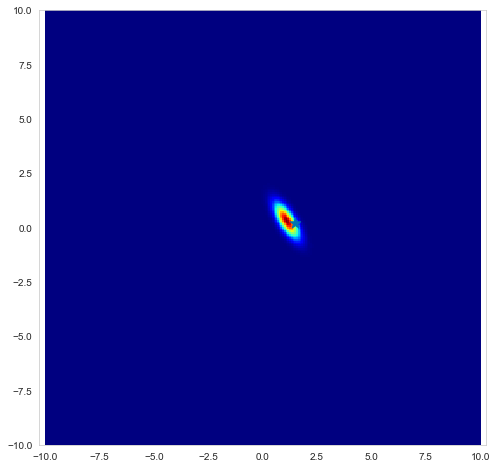

In [84]:
# сделаем пару bayes_update
mu_n, sigma_n = cur_mu, cur_sigma
for i in range(2):
    mu_n, sigma_n = bayesian_update(mu_n, sigma_n, X_train[:,0][i],\
                                    y_train.to_numpy()[i])
    
print('mu: \n',mu_n)
print('sigma: \n',sigma_n)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# апостериорное распределение параметров (при первых 2ух точках)
Z = multivariate_normal.pdf(pos, mean = mu_n, cov = sigma_n) 
myplot_heatmap(Z, True)

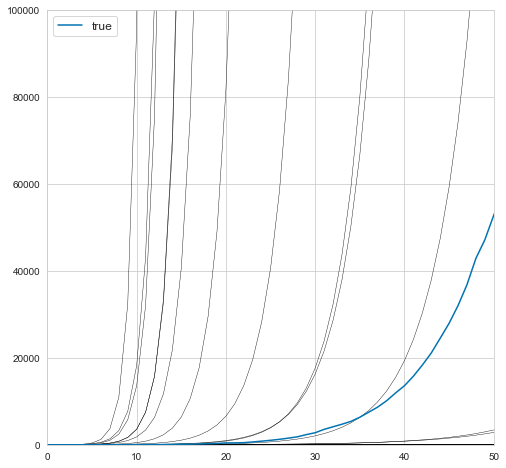

In [85]:
# посемплируем и посмотрим что получется
plt.figure(figsize = (8,8))
myplot_sample_lines(mu_n, sigma_n, n=20, points=None)
plt.plot(np.arange(len(Russia)),Russia['total_cases'], label = 'true')
plt.legend(fontsize = 'large')

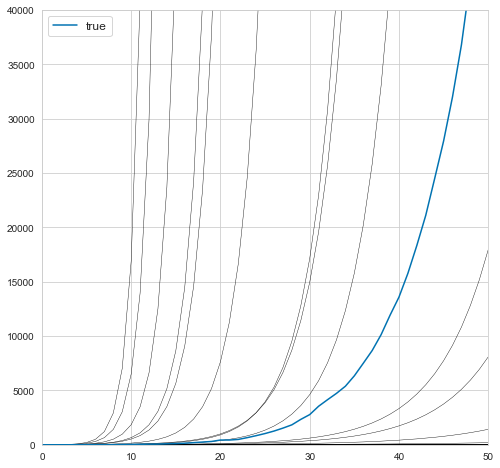

In [86]:
# стоит судить конечно стоит по обучающей выборке того, что мы делаем
plt.figure(figsize = (8,8))
myplot_sample_lines(mu_n, sigma_n, n=20, points=None)
plt.ylim(-0.01,40000)
plt.plot(X_train[:,0],np.exp(y_train), label = 'true')
plt.legend(fontsize = 'large')

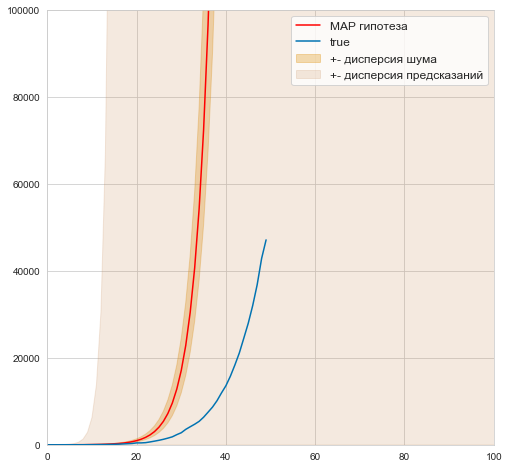

In [87]:
plot_predictions(xs, mu_n, sample_statistics(mu_n, sigma_n, xs, n=1000))
plt.plot(X_train[:,0],np.exp(y_train), label = 'true')
plt.legend(fontsize = 'large')

In [88]:
Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)

mu: 
 [1.47880932 0.20328483]
sigma: 
 [[ 9.99784011e-03 -3.02964842e-04]
 [-3.02964842e-04  1.23662304e-05]]


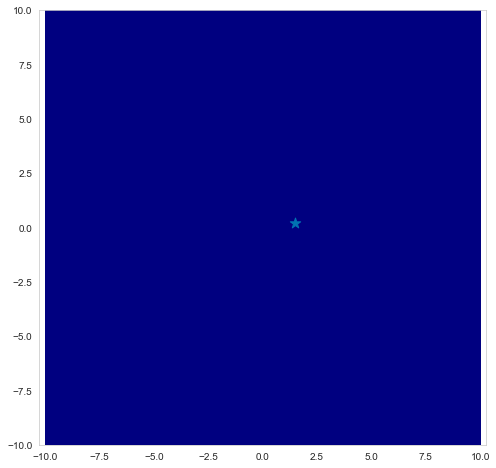

In [89]:
mu_n, sigma_n = cur_mu, cur_sigma
for i in range(len(y_train)):
    mu_n, sigma_n = bayesian_update(mu_n, sigma_n, X_train[:,0][i],\
                                    y_train.to_numpy()[i])
    
print('mu: \n',mu_n)
print('sigma: \n',sigma_n)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# апостериорное распределение параметров (при всех данных)
Z = multivariate_normal.pdf(pos, mean = mu_n, cov = sigma_n) 
myplot_heatmap(Z, True)
# дисперсия очень маленькая потому звездочка накрыла купол гауссианы (собственные значения дисперсии малы => накрытие)

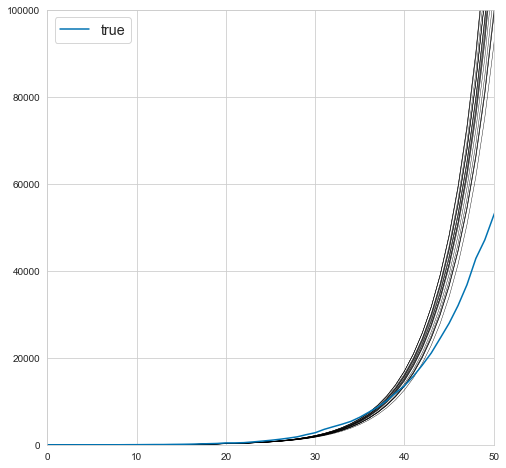

In [90]:
plt.figure(figsize = (8,8))
myplot_sample_lines(mu_n, sigma_n, n=20, points=None)
plt.plot(np.arange(len(Russia)),Russia['total_cases'], label = 'true')
plt.legend(fontsize = 'x-large')

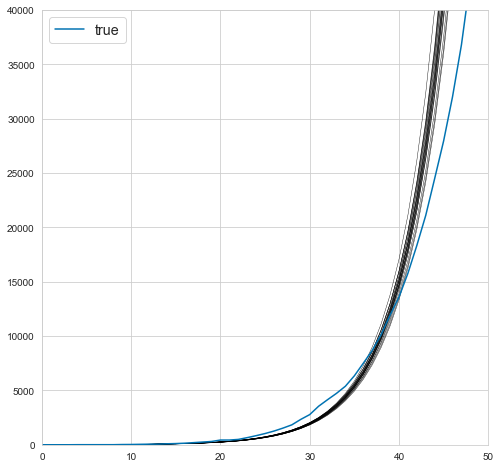

In [91]:
# Только на трейне
plt.figure(figsize = (8,8))
myplot_sample_lines(mu_n, sigma_n, n=20, points=None)
plt.ylim(-0.01,40000)
plt.plot(X_train[:,0],np.exp(y_train), label = 'true')
plt.legend(fontsize = 'x-large')

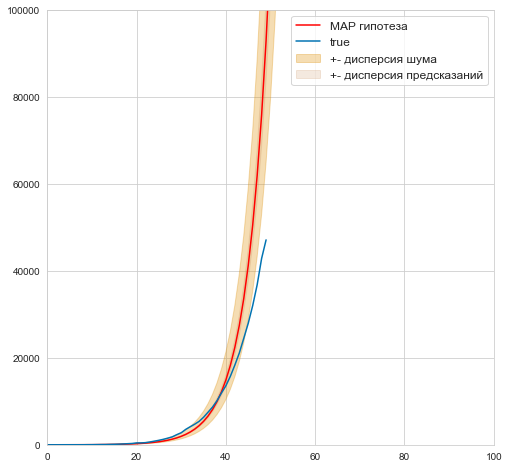

In [94]:
plot_predictions(xs, mu_n, sample_statistics(mu_n, sigma_n, xs, n=1000))
plt.plot(X_train[:,0],np.exp(y_train), label = 'true')
plt.legend(fontsize = 'large')

In [95]:
print('прогноз на 1 мая:', np.exp(linear_regression\
                                  .predict([[(pd.to_datetime('2020-05-01') - pd.to_datetime('2020-03-03')).days]]))[0])
print('прогноз на 1 июнь:', np.exp(linear_regression\
                                  .predict([[(pd.to_datetime('2020-06-01') - pd.to_datetime('2020-03-03')).days]]))[0])
print('прогноз на 1 сентября:', np.exp(linear_regression\
                                  .predict([[(pd.to_datetime('2020-09-01') - pd.to_datetime('2020-03-03')).days]]))[0])

прогноз на 1 мая: 709629.7677139906
прогноз на 1 июнь: 387098703.1967976
прогноз на 1 сентября: 5.1275256962442536e+16
